In [1]:
import sys
import os
sys.path.append(os.path.dirname(os.path.dirname(os.path.abspath('./test_score.ipynb'))))

import numpy as np
import pandas as pd

from ylearn.estimator_model._generalized_forest.tree._grf_tree import GrfTree
from ylearn.estimator_model._generalized_forest._grf import GRForest
from ylearn.exp_dataset.exp_data import sq_data
from ylearn.utils._common import to_df
from ylearn.estimator_model._naive_forest.utils import grad, grad_coef, inverse_grad

from numpy.linalg import lstsq, inv

from copy import deepcopy


n = 2000
d = 10     
n_x = 1
y, x, v = sq_data(n, d, n_x)

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])
w = deepcopy(v)
v_test = v[:min(100, n)].copy()
v_test[:, 0] = np.linspace(np.percentile(v[:, 0], 1), np.percentile(v[:, 0], 99), min(100, n))
data = to_df(treatment=x, outcome=y, v=v)
test_data = to_df(v=v_test)

outcome = 'outcome'
treatment = 'treatment'
adjustment = data.columns[2:]
from sklearn.preprocessing import OneHotEncoder
oh = OneHotEncoder()
# x = oh.fit_transform(x).toarray().astype(np.float32)



gtre = GrfTree(max_depth=100000, max_leaf_nodes=np.int(100000))
gtre._fit_with_array(x, y, w=None, v=v, i=1)
gtre.tree_.predict(v[:50].astype(np.float32)).squeeze()

array([ 0.07144379, -0.30602605,  1.71559724, -0.27135004, -0.10237191,
       -0.32924718,  0.21400034, -0.71116216,  2.80058766,  1.48035956,
        0.28154591, -0.11772502,  1.2836452 , -0.08198122, -0.08198122,
        0.13862856, -0.76625044, -0.08198122,  1.68117291,  1.53253659,
        1.32407611, -0.32020137,  2.20334568, -0.47967295,  1.05121514,
        5.33291398,  1.20370696,  0.00895498, -0.15195766, -0.6797273 ,
       -0.44083678,  2.62236404,  1.46047854, -0.10941884,  0.31452394,
        0.66291419, -0.27518667, -0.21910299,  0.05828689, -0.43389748,
        3.26893827,  1.31313758, -0.32924718, -0.29355244,  1.59054867,
        0.17651058,  1.20370696,  1.32407611, -0.08198122,  0.07648567])

In [35]:
leaf_records = (gtre.tree_.predict(v.astype(np.float32))).reshape(1, -1)
y_pred = gtre.tree_.predict(v_test.astype(np.float32)).reshape(-1, 1)

In [2]:
from ylearn.estimator_model._naive_forest import _GrfTree, NaiveGrf
gt = _GrfTree()
gt._fit_with_array(x=x, y=y.squeeze(), w=w, v=v, i=1)

In [3]:
gt._predict_with_array(w[:50], v=v[:50])

array([ 3.13885206e-01, -3.06026049e-01,  1.71559724e+00, -2.71350038e-01,
        4.02624824e-04,  1.49921012e-01,  2.14000336e-01, -7.11162160e-01,
        2.80058766e+00,  1.48035956e+00,  2.81545914e-01, -1.17725023e-01,
        1.28364520e+00, -3.84078177e-01, -3.84078177e-01,  1.38628565e-01,
       -7.66250441e-01, -3.84078177e-01,  1.87491260e+00,  1.87491260e+00,
        1.15900478e+00, -3.20201366e-01,  2.20334568e+00, -7.05173263e-01,
        1.46992891e+00,  3.54841921e+00,  1.45465015e+00, -1.53209495e-01,
       -8.78429145e-02, -2.24286892e-01, -4.40836781e-01,  2.62236404e+00,
        1.46047854e+00, -1.09418837e-01,  3.90361259e-01,  6.62914192e-01,
       -2.75186666e-01,  3.18272514e-01,  5.82868938e-02, -4.33897478e-01,
        3.26893827e+00,  1.31313758e+00,  1.49921012e-01, -5.37285693e-01,
        1.59054867e+00,  3.12178882e-01,  1.45465015e+00,  1.15900478e+00,
       -3.84078177e-01, -2.80234744e-01])

In [4]:
grf = GRForest(n_jobs=1, n_estimators=100, min_impurity_decrease=1e-8, max_depth=100, max_leaf_nodes=100, verbose=0,)
grf.fit(
    data=data, outcome=outcome, treatment=treatment, adjustment=adjustment, covariate=adjustment
)

In [5]:
effect = grf._prepare4est(test_data)

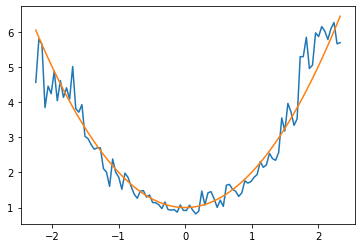

In [6]:
import matplotlib.pyplot as plt

true_te = lambda X: np.hstack([X[:, [0]]**2 + 1, np.ones((X.shape[0], n_x - 1))])

for t in range(n_x):
    plt.plot(v_test[:, 0], effect[:, t])
    plt.plot(v_test[:, 0], true_te(v_test)[:, t])
plt.show()